In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

In [5]:
import kagglehub
import os
path = kagglehub.dataset_download("samanfatima7/2020-2025-apple-stock-dataset")
print("Path to dataset files:", path)
file_path = os.path.join(path, 'apple_5yr_one.csv')
df = pd.read_csv(file_path)

Path to dataset files: /kaggle/input/2020-2025-apple-stock-dataset


In [8]:
df.columns = df.iloc[0]  # shift header
df = df[1:].copy()
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

In [9]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
    df[col] = pd.to_numeric(df[col].str.replace(',', '').astype(str), errors='coerce')

In [10]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1254 entries, 2 to 1255
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1254 non-null   datetime64[ns]
 1   Close   1254 non-null   float64       
 2   High    1254 non-null   float64       
 3   Low     1254 non-null   float64       
 4   Open    1254 non-null   float64       
 5   Volume  1254 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 58.9 KB
None
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [11]:
df.dropna(inplace=True)

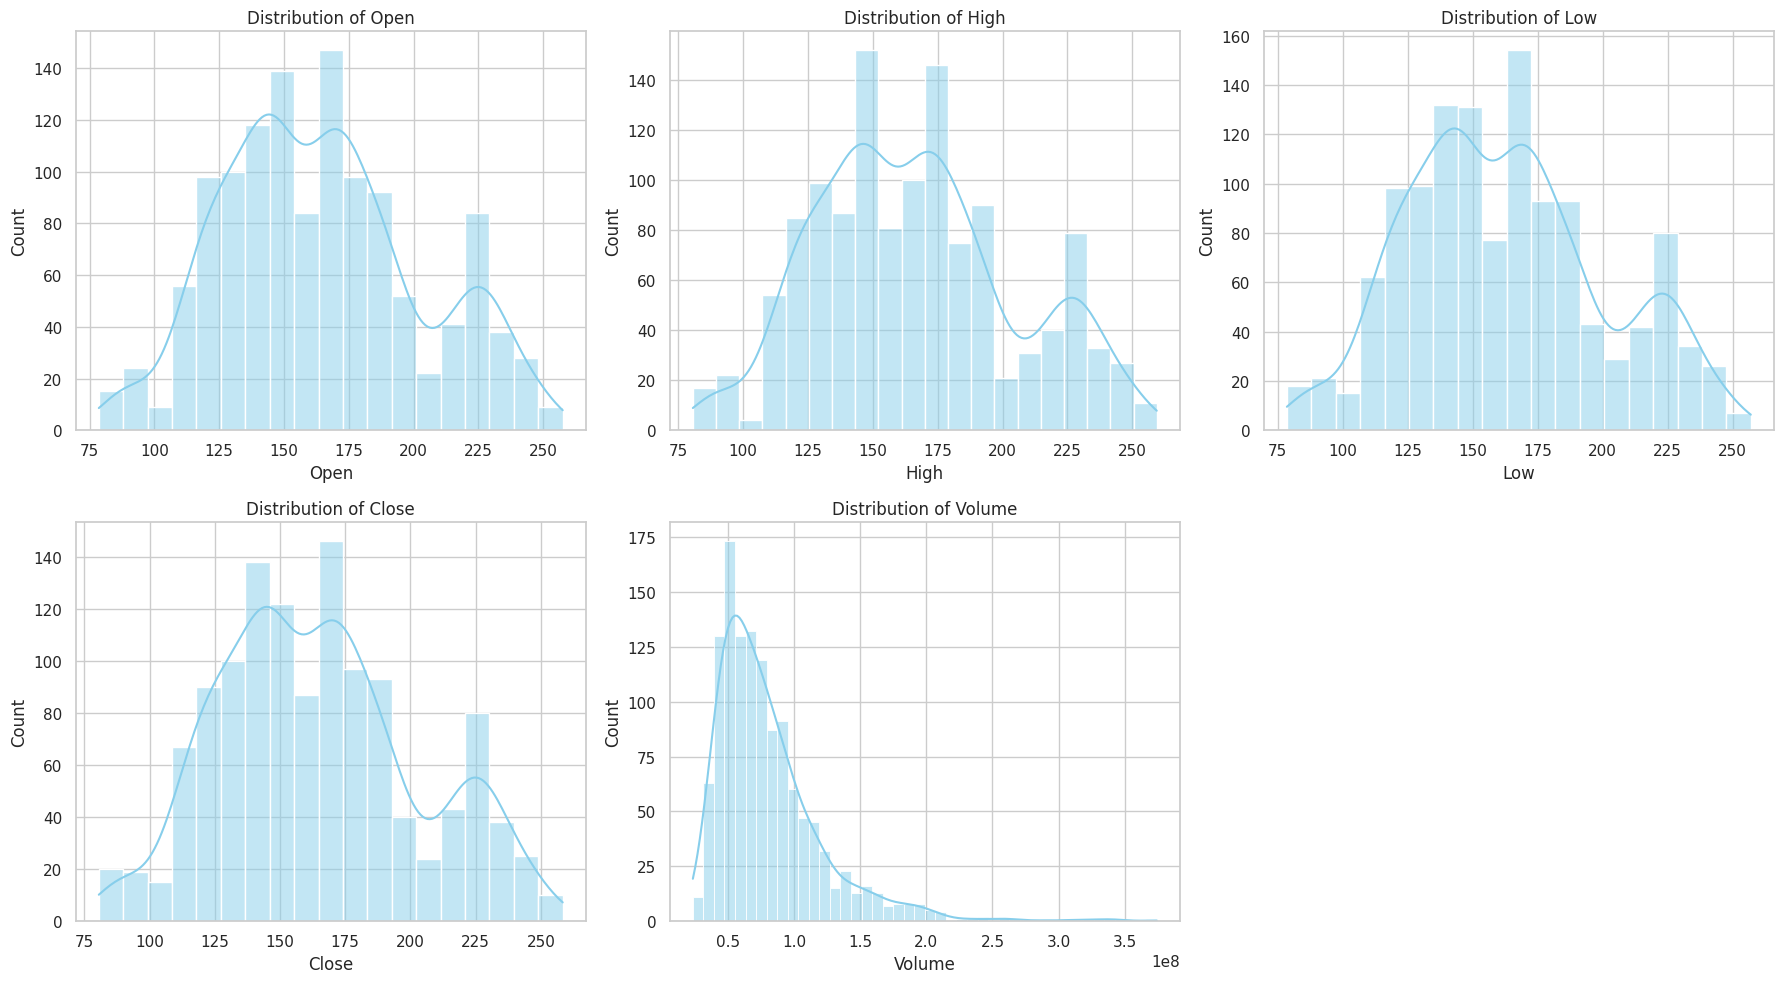

In [12]:
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
fig, axes = plt.subplots(2, 3, figsize=(18,10))
axes = axes.flatten()
for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
fig.delaxes(axes[-1])
plt.tight_layout()

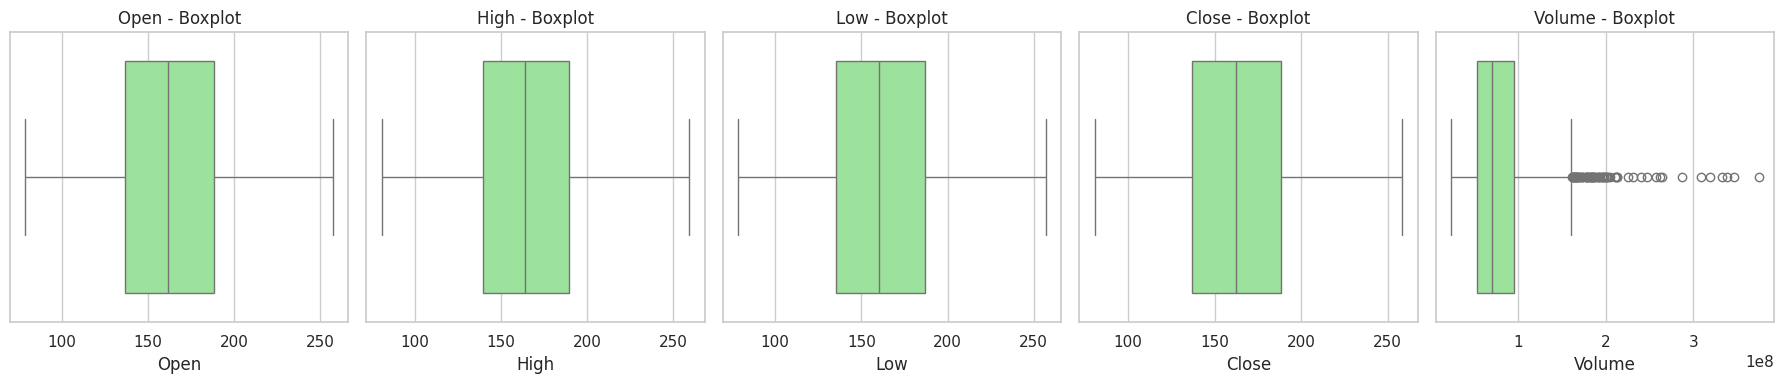

In [13]:
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 4))
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='lightgreen')
    axes[i].set_title(f'{col} - Boxplot')
plt.tight_layout()

In [14]:
outliers = pd.DataFrame(index=df.index)
for col in numeric_cols:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    mask = (df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)
    outliers[col] = mask
print("Proportion of outliers per column:")
print(outliers.mean())

Proportion of outliers per column:
Open      0.000000
High      0.000000
Low       0.000000
Close     0.000000
Volume    0.051834
dtype: float64


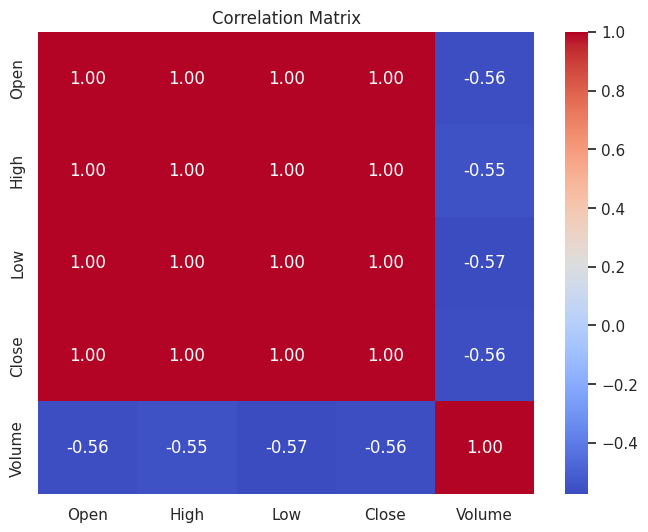

In [15]:
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

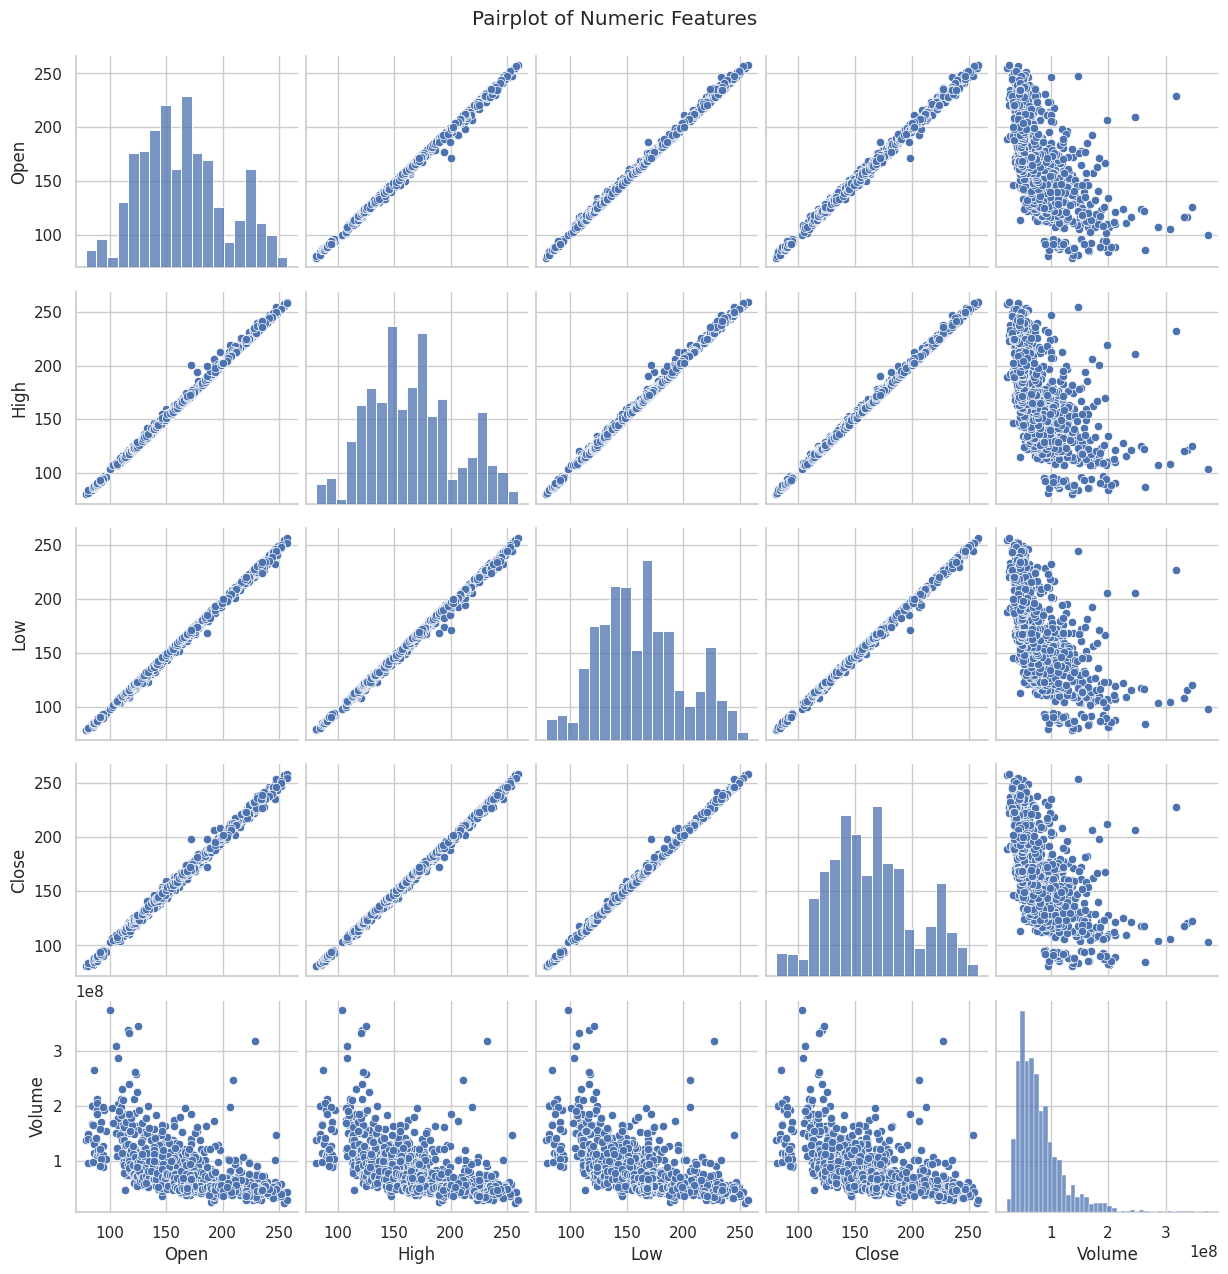

In [16]:
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

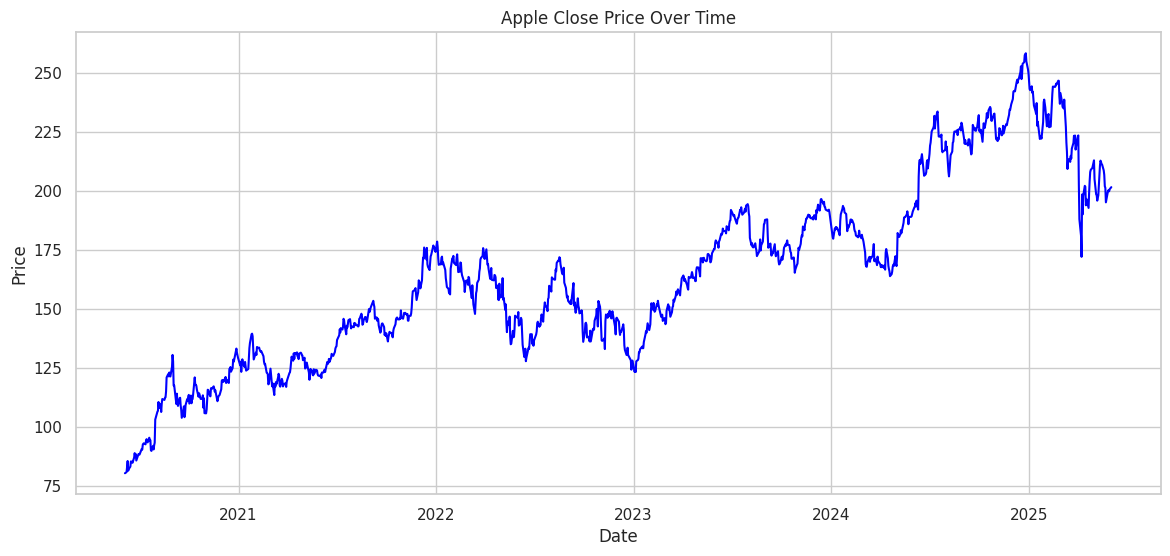

In [17]:
plt.figure(figsize=(14,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Apple Close Price Over Time')
plt.show()

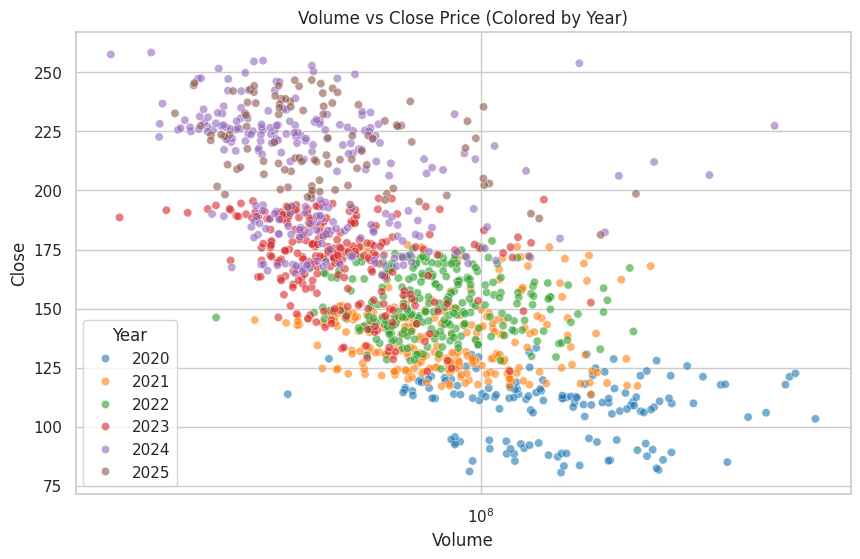

In [18]:
df['Year'] = df['Date'].dt.year
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Volume', y='Close', hue='Year', palette='tab10', alpha=0.6)
plt.xscale('log')
plt.title('Volume vs Close Price (Colored by Year)')
plt.show()